In [1]:
#Three decades of movie data (1986-2020), from Kaggle.

In [2]:
## Lets import libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime


In [3]:
## Lets read the data

movies= pd.read_csv("movies.csv")

In [4]:
movies

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000.0,NaN,NaN,90.0
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,NaN,NaN,Cactus Blue Entertainment,90.0
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750.0,NaN,Embi Productions,NaN
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000.0,NaN,NaN,120.0


In [5]:
movies.isnull().sum()

name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

In [6]:
movies.describe()

,year,score,votes,budget,gross,runtime
count,7668.000000,7665.000000,7.665000e+03,5.497000e+03,7.479000e+03,7664.000000
mean,2000.405451,6.390411,8.810850e+04,3.558988e+07,7.850054e+07,107.261613
std,11.153508,0.968842,1.633238e+05,4.145730e+07,1.657251e+08,18.581247
min,1980.000000,1.900000,7.000000e+00,3.000000e+03,3.090000e+02,55.000000
25%,1991.000000,5.800000,9.100000e+03,1.000000e+07,4.532056e+06,95.000000
50%,2000.000000,6.500000,3.300000e+04,2.050000e+07,2.020576e+07,104.000000
75%,2010.000000,7.100000,9.300000e+04,4.500000e+07,7.601669e+07,116.000000
max,2020.000000,9.300000,2.400000e+06,3.560000e+08,2.847246e+09,366.000000


In [7]:
## lets check if the year and released are same or not
 
# Extract date and city
movies[['date', 'city']] = movies['released'].str.split(' \(', expand=True)
movies['city'] = movies['city'].str.rstrip(')')

#In this code, str.split(' \(', expand=True) splits the "released" column into two parts: the date and the city, and then str.rstrip(')') removes the closing parenthesis from the city.

## now lets get the coorect year column 
movies['correct_year'] = pd.to_datetime(movies['date']).dt.year

## lets compare and check if the year column = correct_year column 
movies['same_year'] = movies['year'] == movies['correct_year']

In [8]:
movies

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,date,city,correct_year,same_year
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0,"June 13, 1980",United States,1980.0,True
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0,"July 2, 1980",United States,1980.0,True
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0,"June 20, 1980",United States,1980.0,True
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0,"July 2, 1980",United States,1980.0,True
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0,"July 25, 1980",United States,1980.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000.0,NaN,NaN,90.0,"October 23, 2020",United States,2020.0,True
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,NaN,NaN,Cactus Blue Entertainment,90.0,"February 7, 2020",United States,2020.0,True
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750.0,NaN,Embi Productions,NaN,"April 27, 2020",Cameroon,2020.0,True
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000.0,NaN,NaN,120.0,"October 1, 2020",United States,2020.0,True


In [9]:
movies['same_year'].describe()
## as it can be seen the year column is not true with the released year, we will go ahead with correct_year column further in data proces

count     7668
unique       2
top       True
freq      6342
Name: same_year, dtype: object

In [10]:
# Convert 'correct_year' column from float to int
movies['correct_year'] = movies['correct_year'].astype(pd.Int64Dtype())

In [11]:
movies.sort_values(by=['gross'],inplace=False, ascending=False)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,date,city,correct_year,same_year
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000.0,2.847246e+09,Twentieth Century Fox,162.0,"December 18, 2009",United States,2009,True
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000.0,2.797501e+09,Marvel Studios,181.0,"April 26, 2019",United States,2019,True
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000.0,2.201647e+09,Twentieth Century Fox,194.0,"December 19, 1997",United States,1997,True
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000.0,2.069522e+09,Lucasfilm,138.0,"December 18, 2015",United States,2015,True
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000.0,2.048360e+09,Marvel Studios,149.0,"April 27, 2018",United States,2018,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000.0,NaN,NaN,90.0,"October 23, 2020",United States,2020,True
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,NaN,NaN,Cactus Blue Entertainment,90.0,"February 7, 2020",United States,2020,True
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750.0,NaN,Embi Productions,NaN,"April 27, 2020",Cameroon,2020,True
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000.0,NaN,NaN,120.0,"October 1, 2020",United States,2020,True


In [12]:
#lets check for duplicate columns
movies.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
7663    False
7664    False
7665    False
7666    False
7667    False
Length: 7668, dtype: bool

In [13]:
movies['year'].unique()

array([1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990,
       1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001,
       2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012,
       2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020], dtype=int64)

In [14]:
# lets make a Hypothesis that, company has high co-relation
#budget high co-relation
#company high co-relation

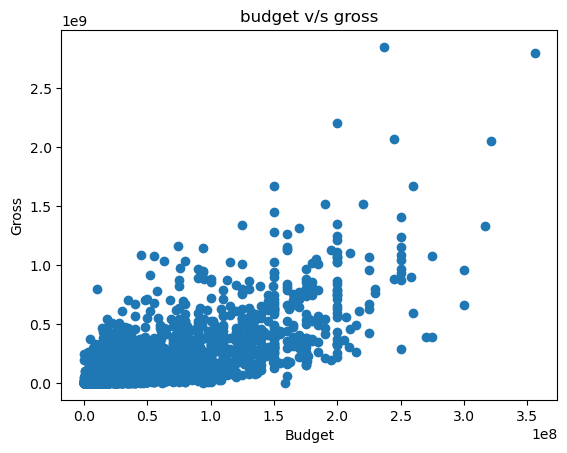

In [15]:
# scatter plot for budget v/s gross

plt.scatter(x=movies['budget'], y=movies['gross'])
plt.title('budget v/s gross')
plt.xlabel('Budget')
plt.ylabel('Gross')
plt.show()

<Axes: xlabel='budget', ylabel='gross'>

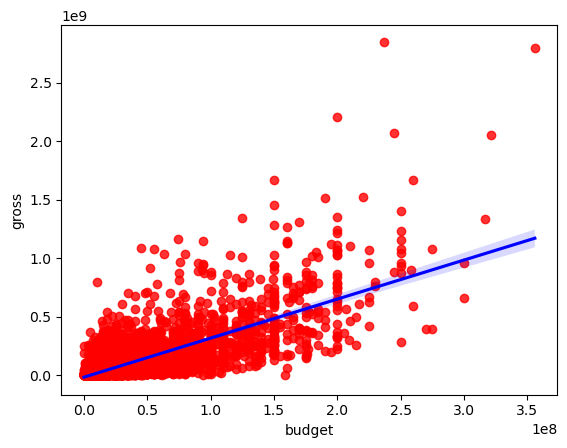

In [16]:
# now lets make a linear regression line in this scatter plot using seaborn

sns.regplot(x='budget', y='gross', data=movies, scatter_kws={"color": "red"}, line_kws={"color": "blue"})


In [17]:
## lets start looking for co-relation

In [18]:
movies.corr()

C:\Users\SIMRAN\AppData\Local\Temp\ipykernel_7076\1738869300.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  movies.corr()


,year,score,votes,budget,gross,runtime,correct_year,same_year
year,1.000000,0.097995,0.222945,0.329321,0.257486,0.120811,0.997415,-0.012163
score,0.097995,1.000000,0.409182,0.076254,0.186258,0.399451,0.105994,-0.165669
votes,0.222945,0.409182,1.000000,0.442429,0.630757,0.309212,0.218429,0.080450
budget,0.329321,0.076254,0.442429,1.000000,0.740395,0.320447,0.321918,0.180592
gross,0.257486,0.186258,0.630757,0.740395,1.000000,0.245216,0.250514,0.144928
runtime,0.120811,0.399451,0.309212,0.320447,0.245216,1.000000,0.120636,-0.018272
correct_year,0.997415,0.105994,0.218429,0.321918,0.250514,0.120636,1.000000,-0.055025
same_year,-0.012163,-0.165669,0.080450,0.180592,0.144928,-0.018272,-0.055025,1.000000


In [20]:
correlation_matrix= movies.corr()

C:\Users\SIMRAN\AppData\Local\Temp\ipykernel_7076\2709891513.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix= movies.corr()


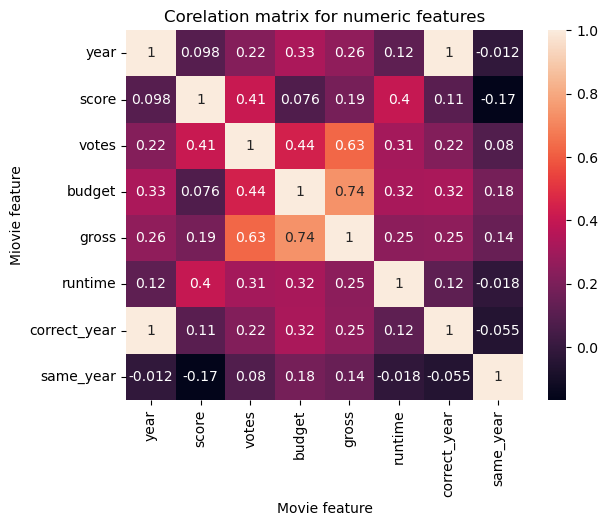

In [21]:
sns.heatmap(correlation_matrix, annot=True)
plt.title('Corelation matrix for numeric features')
plt.xlabel('Movie feature')
plt.ylabel('Miovie feature')
plt.show()

In [22]:
# we can say that budget and gross has high correlation

In [23]:
# lets explore company as it is a string, first we will convert this to a int
movies_numeric_columns=movies


for col_name in movies_numeric_columns.columns:
    if movies_numeric_columns[col_name].dtype == 'object':
        movies_numeric_columns[col_name] = movies_numeric_columns[col_name].astype('category')
        movies_numeric_columns[col_name] = movies_numeric_columns[col_name].cat.codes  #to assign a numeric values to object columns

        
movies_numeric_columns

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,date,city,correct_year,same_year
0,6587,6,6,1980,1705,8.4,927000.0,2589,4014,1047,54,19000000.0,46998772.0,2319,146.0,1510,56,1980,True
1,5573,6,1,1980,1492,5.8,65000.0,2269,1632,327,55,4500000.0,58853106.0,731,104.0,1311,56,1980,True
2,5142,4,0,1980,1771,8.7,1200000.0,1111,2567,1745,55,18000000.0,538375067.0,1540,124.0,1568,56,1980,True
3,286,4,4,1980,1492,7.7,221000.0,1301,2000,2246,55,3500000.0,83453539.0,1812,88.0,1311,56,1980,True
4,1027,6,4,1980,1543,7.3,108000.0,1054,521,410,55,6000000.0,39846344.0,1777,98.0,1360,56,1980,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,3705,-1,6,2020,2964,3.1,18.0,1500,2289,2421,55,7000.0,NaN,-1,90.0,2582,56,2020,True
7664,1678,-1,4,2020,1107,4.7,36.0,774,2614,1886,55,NaN,NaN,539,90.0,975,56,2020,True
7665,4717,-1,6,2020,193,5.7,29.0,2061,2683,2040,55,58750.0,NaN,941,NaN,162,8,2020,True
7666,2843,-1,6,2020,2817,NaN,NaN,1184,1824,450,55,15000.0,NaN,-1,120.0,2462,56,2020,True


In [24]:
movies_numeric_columns.corr()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,date,city,correct_year,same_year
name,1.000000,-0.008069,0.016355,0.011453,-0.011311,0.017097,0.013088,0.009079,0.009081,0.006472,-0.010737,0.023970,0.005533,0.009211,0.010392,-0.011223,-0.001968,0.010699,0.003614
rating,-0.008069,1.000000,0.072423,0.008779,0.016613,-0.001314,0.033225,0.019483,-0.005921,0.013405,0.081244,-0.176002,-0.107339,-0.032943,0.062145,0.015735,0.023977,0.006741,-0.046430
genre,0.016355,0.072423,1.000000,-0.081261,0.029822,0.027965,-0.145307,-0.015258,0.006567,-0.005477,-0.037615,-0.356564,-0.235650,-0.071067,-0.052711,0.029039,-0.091572,-0.077911,-0.110644
year,0.011453,0.008779,-0.081261,1.000000,-0.000695,0.097995,0.222945,-0.020795,-0.008656,-0.027242,-0.070938,0.329321,0.257486,-0.010431,0.120811,-0.000832,-0.089289,0.997415,-0.012163
released,-0.011311,0.016613,0.029822,-0.000695,1.000000,0.042788,0.016097,-0.001478,-0.002404,0.015777,-0.020427,0.014683,0.001659,-0.010474,0.000868,0.999912,-0.044096,-0.004644,0.110840
score,0.017097,-0.001314,0.027965,0.097995,0.042788,1.000000,0.409182,0.009559,0.019416,-0.001609,-0.133348,0.076254,0.186258,0.001030,0.399451,0.042918,-0.092763,0.105994,-0.165669
votes,0.013088,0.033225,-0.145307,0.222945,0.016097,0.409182,1.000000,0.000260,0.000892,-0.019282,0.073625,0.442429,0.630757,0.133204,0.309212,0.017111,0.092014,0.218429,0.080450
director,0.009079,0.019483,-0.015258,-0.020795,-0.001478,0.009559,0.000260,1.000000,0.299067,0.039234,0.017490,-0.012272,-0.014441,0.004404,0.017624,-0.001275,0.013331,-0.020422,-0.019467
writer,0.009081,-0.005921,0.006567,-0.008656,-0.002404,0.019416,0.000892,0.299067,1.000000,0.027245,0.015343,-0.039451,-0.023519,0.005646,-0.003511,-0.002421,-0.001201,-0.008611,-0.008093
star,0.006472,0.013405,-0.005477,-0.027242,0.015777,-0.001609,-0.019282,0.039234,0.027245,1.000000,-0.012998,-0.019589,-0.002717,0.012442,0.010174,0.015597,-0.023540,-0.027611,0.019237


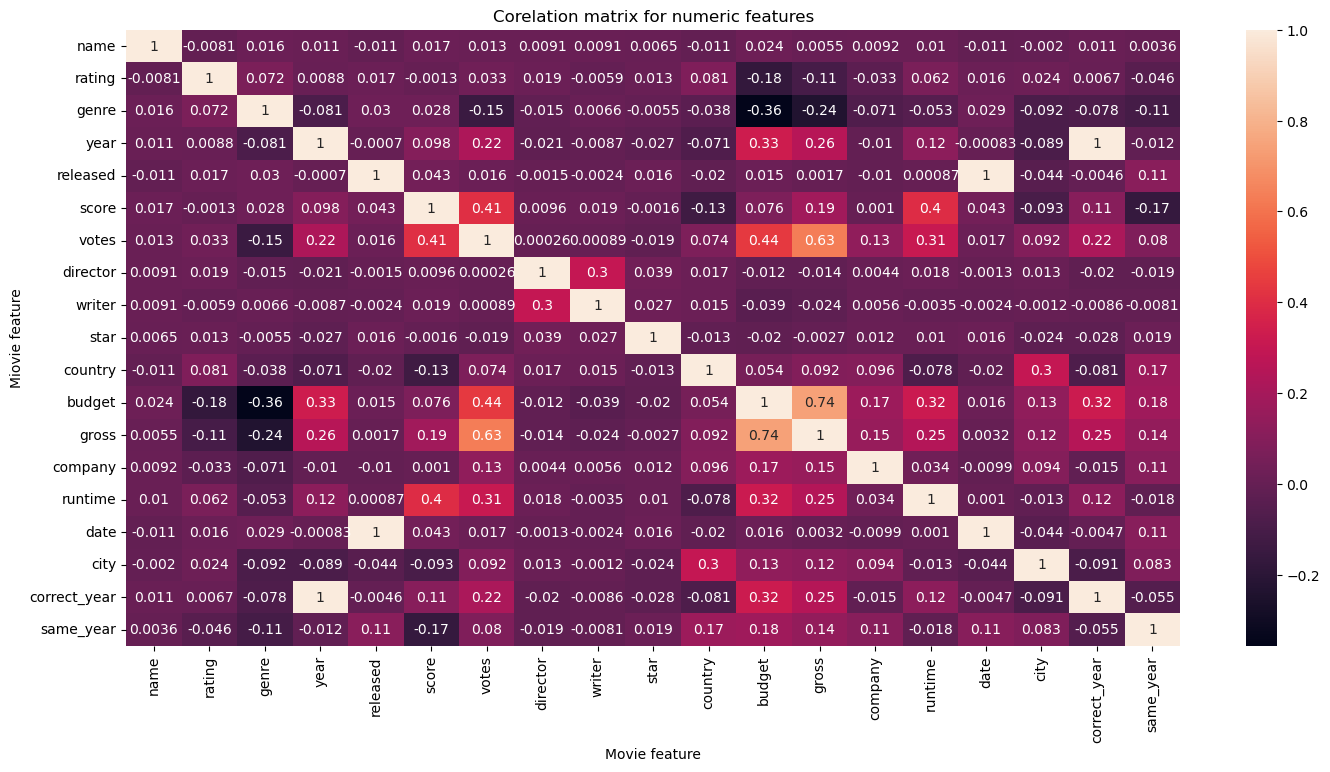

In [25]:
correlation_matrix= movies_numeric_columns.corr()
plt.figure(figsize=(17, 8))
sns.heatmap(correlation_matrix, annot=True)
plt.title('Corelation matrix for numeric features')
plt.xlabel('Movie feature')
plt.ylabel('Miovie feature')
plt.show()

In [26]:
correlation_mat=movies_numeric_columns.corr()
corr_pairs=correlation_mat.unstack()
sorted_pairs=corr_pairs.sort_values()
sorted_pairs

genre      budget      -0.356564
budget     genre       -0.356564
genre      gross       -0.235650
gross      genre       -0.235650
rating     budget      -0.176002
                          ...   
company    company      1.000000
runtime    runtime      1.000000
date       date         1.000000
writer     writer       1.000000
same_year  same_year    1.000000
Length: 361, dtype: float64

In [27]:
high_corr=sorted_pairs[(sorted_pairs)>0.5]

In [28]:
high_corr

gross         votes           0.630757
votes         gross           0.630757
budget        gross           0.740395
gross         budget          0.740395
correct_year  year            0.997415
year          correct_year    0.997415
released      date            0.999912
date          released        0.999912
name          name            1.000000
star          star            1.000000
city          city            1.000000
rating        rating          1.000000
genre         genre           1.000000
year          year            1.000000
released      released        1.000000
score         score           1.000000
votes         votes           1.000000
correct_year  correct_year    1.000000
director      director        1.000000
country       country         1.000000
budget        budget          1.000000
gross         gross           1.000000
company       company         1.000000
runtime       runtime         1.000000
date          date            1.000000
writer        writer     

In [ ]:
# Votes and budget has the high correlation to gross earning
# Hypothesis was company will have high co-relation and IT CAN BE SEEN THE HYPOTHESIS WAS WRONG.
# COMPANY HAS LOW CORRELATION